# Reproduce detection of HD3167

The crux of K2 pipeline reprocessing is to-what-extent the reprocessing affects scientific results.  As a demo of this question we will take a deep dive on a single light curve.  We need a campaign 8 target, so I have chosen the target HD3167 (EPIC 220383386), which is the subject of at least two single-object papers:
- [Vanderburg et al. 2016](http://iopscience.iop.org/article/10.3847/2041-8205/829/1/L9/meta)
- [Gandolfi et al. 2017](http://adsabs.harvard.edu/abs/2017AJ....154..123G)

Figure 1 of Vanderburg et al. 2016 shows the K2 Campaign 8 lightcurve processed through the SFF algorithm of [Vanderburg and Johnson 2014](http://adsabs.harvard.edu/abs/2014PASP..126..948V).

In [1]:
! head /Users/obsidian/Desktop/defaults.py

head: cannot open `/Users/obsidian/Desktop/defaults.py' for reading: No such file or directory


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
! head ../data/c08/220300000/83386/hlsp_k2sff_k2_lightcurve_220383386-c08_kepler_v1_llc-default-aper.txt

BJD - 2454833, Corrected Flux
2560.743515777, 1.000609380,
2560.763947938, 1.000457851,
2560.784379899, 1.000523234,
2560.804811959, 1.000729275,
2560.825244119, 1.000586643,
2560.845676079, 1.000391397,
2560.866108137, 1.000524650,
2560.886540295, 1.000646291,
2560.906972253, 1.000583759,


In [4]:
col_names = ['BJD - 2454833', 'Corrected Flux', 'junk']

In [5]:
fn = '../data/c08/220300000/83386/hlsp_k2sff_k2_lightcurve_220383386-c08_kepler_v1_llc-default-aper.txt'

In [6]:
df_llc = pd.read_csv(fn, names=col_names, usecols=col_names[:-1], skiprows=1)

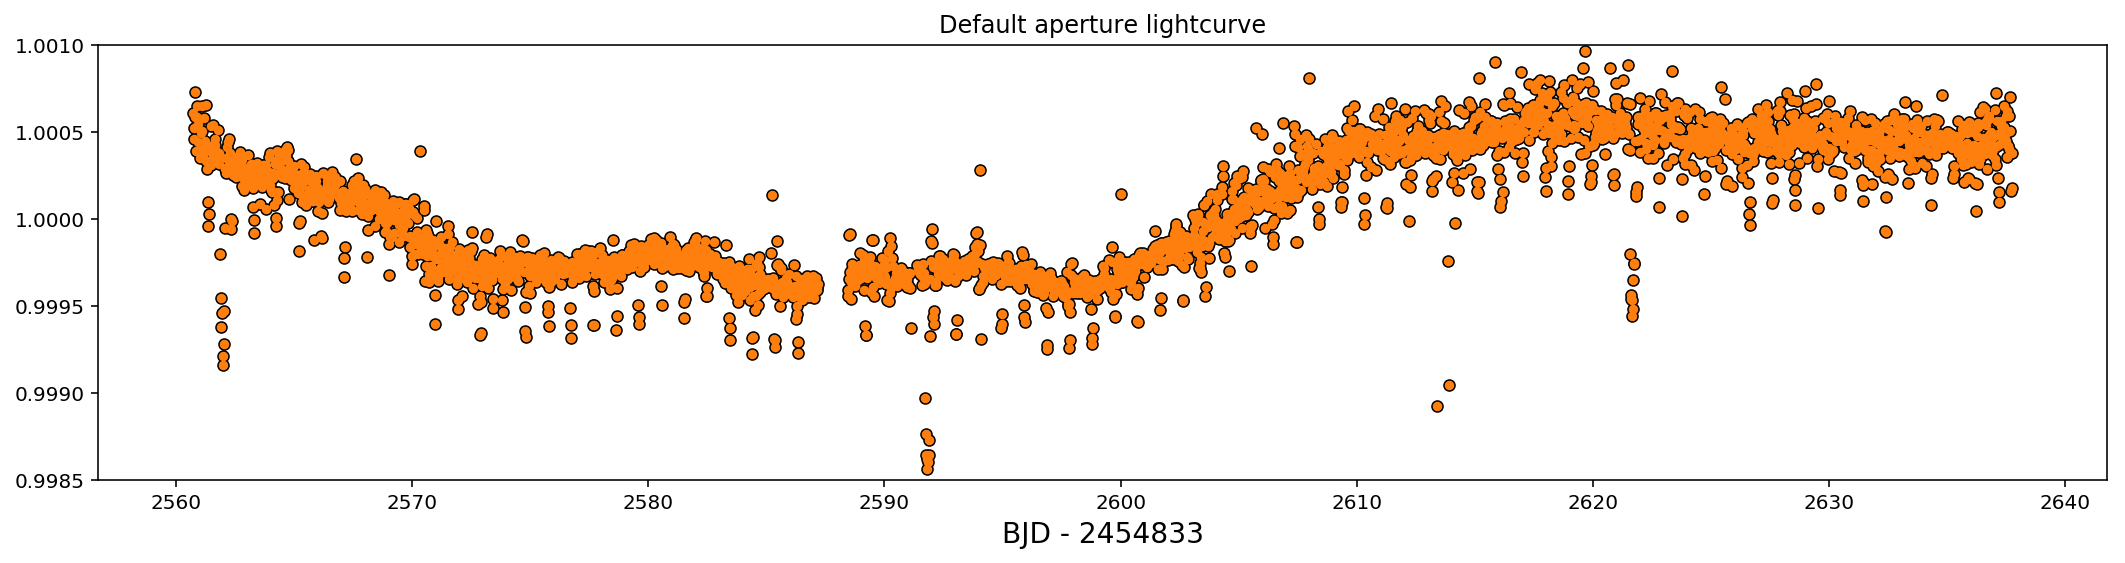

In [7]:
plt.figure(figsize=(18, 4))
plt.scatter(df_llc['BJD - 2454833'], df_llc['Corrected Flux'], marker='o', s=28, edgecolors='k')
plt.scatter(df_llc['BJD - 2454833'], df_llc['Corrected Flux'], marker='o', s=14)
plt.ylim(0.9985, 1.0010)
plt.xlabel('BJD - 2454833', fontsize=14)
plt.title('Default aperture lightcurve');

![image](http://iopscience.iop.org/2041-8205/829/1/L9/downloadHRFigure/figure/apjlaa3ba2f1)

*Figure 1 from Vanderburg et al, 2016*

OK, it looks similar, but not identical.  The paper notes the lightcurve reduction strategy:
> We extracted the light curve from a photometric
aperture shaped like the image of the star on the detector, with
an average radius of about 20″. After identifying the transits,
we reprocessed the raw K2 light curve to remove systematics
while simultaneously fitting for stellar variability and the two
planets’ transit signals

So maybe the apertures aren't identical.  A 20 arcsecond radius is 5 pixels radius, or 10 pixels diameter.  Let's look for one of the apertures with 10 pixels diameter.

In [8]:
! ls ../data/c08/220300000/83386/

hlsp_k2sff_k2_lightcurve_220383386-c08_kepler_v1_llc-default-aper.txt
hlsp_k2sff_k2_lightcurve_220383386-c08_kepler_v1_llc.fits


In [9]:
from astropy.io import fits

In [10]:
hdu = fits.open('../data/c08/220300000/83386/hlsp_k2sff_k2_lightcurve_220383386-c08_kepler_v1_llc.fits')

In [11]:
#hdu.info()
#hdu['CIRC_APER_TBL'].data.shape # (10, 23, 15)

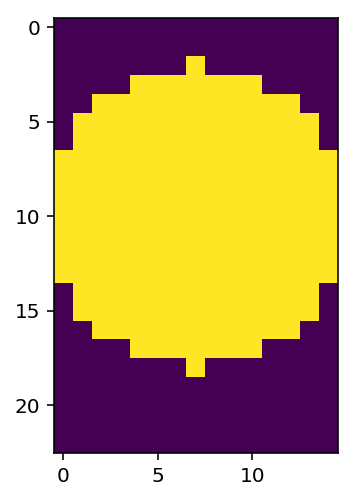

In [12]:
plt.imshow(hdu['CIRC_APER_TBL'].data[7, :, :])

In [13]:
hdu['CIRC_APER_TBL'].data[5,:,7].sum()

9.0

That looks roughly like a 10 pixel diameter circle.

In [14]:
#hdu.info()

In [15]:
hdu['CIRC_APER7'].data['T']

array([ 2560.74351578,  2560.76394794,  2560.7843799 , ...,  2637.68921144,
        2637.73007514,  2637.75050714])

In [16]:
hdu['CIRC_APER7'].data['FCOR'] #also FRAW

array([ 1.00052488,  1.00038001,  1.00043409, ...,  1.00018174,
        1.00033351,  1.00039538])

In [17]:
hdu['CIRC_APER7'].data['T']

array([ 2560.74351578,  2560.76394794,  2560.7843799 , ...,  2637.68921144,
        2637.73007514,  2637.75050714])

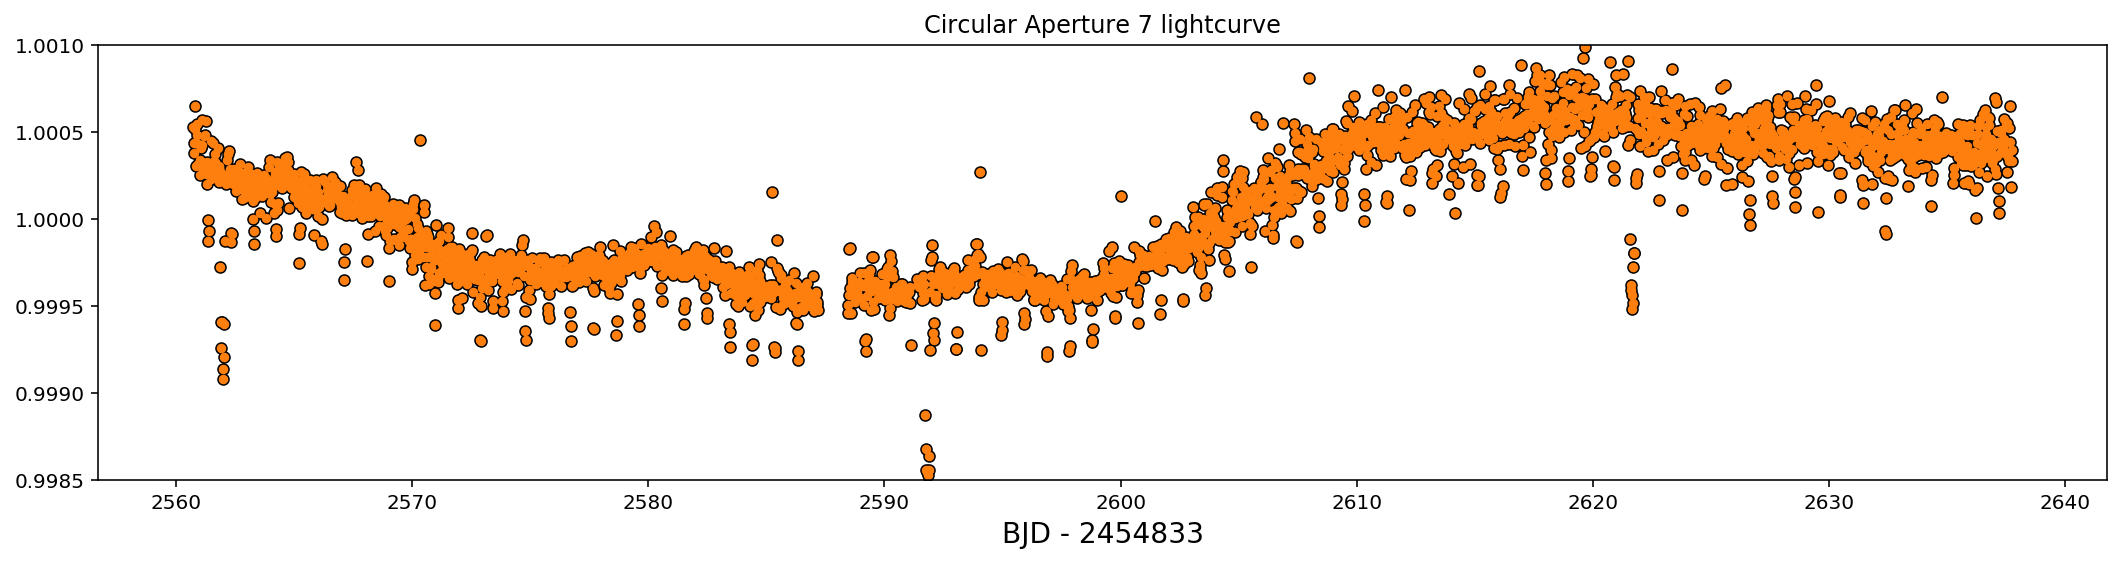

In [18]:
plt.figure(figsize=(18, 4))
#plt.scatter(df_llc['BJD - 2454833'], df_llc['Corrected Flux'], marker='o', s=14)
plt.scatter(hdu['CIRC_APER7'].data['T'], hdu['CIRC_APER7'].data['FCOR'], marker='o', s=28, edgecolors='k')
plt.scatter(hdu['CIRC_APER7'].data['T'], hdu['CIRC_APER7'].data['FCOR'], marker='o', s=14)
plt.ylim(0.9985, 1.0010)
plt.xlabel('BJD - 2454833', fontsize=14)
plt.title('Circular Aperture 7 lightcurve');

In [19]:
#![image](http://iopscience.iop.org/2041-8205/829/1/L9/downloadHRFigure/figure/apjlaa3ba2f1)

## Comparison to EVEREST

How does this object look in EVEREST?

In [20]:
import everest

ModuleNotFoundError: No module named 'everest'

In [21]:
star = everest.Everest(220383386)

NameError: name 'everest' is not defined

In [22]:
star.aperture.shape

(23, 15)

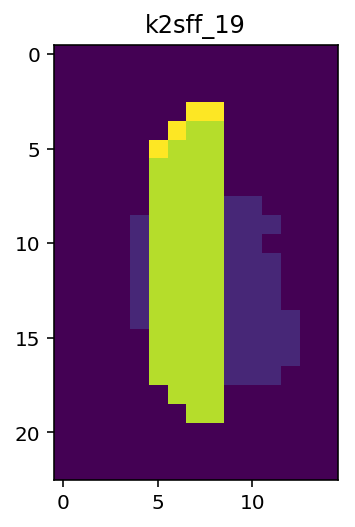

In [23]:
plt.imshow(star.aperture)
plt.title(star.aperture_name);

In [24]:
star.saturated

True

It's a saturated aperture.

In [25]:
star.fcor

array([ 4017576.66892506,  4016422.2388499 ,  4015914.65908856, ...,
        4015344.87725884,  4016630.66685513,  4016294.80934638])

In [26]:
star.flux

array([ 4017555.00146073,  4016400.71317254,  4015893.27463651, ...,
        4026482.7255735 ,  4027765.31991859,  4027426.25647922])

In [27]:
star.fraw

array([ 4020271.85850525,  4019319.78740311,  4019011.35624313, ...,
        4015782.41784668,  4016241.47755051,  4017140.50147247])

(0.996, 1.001)

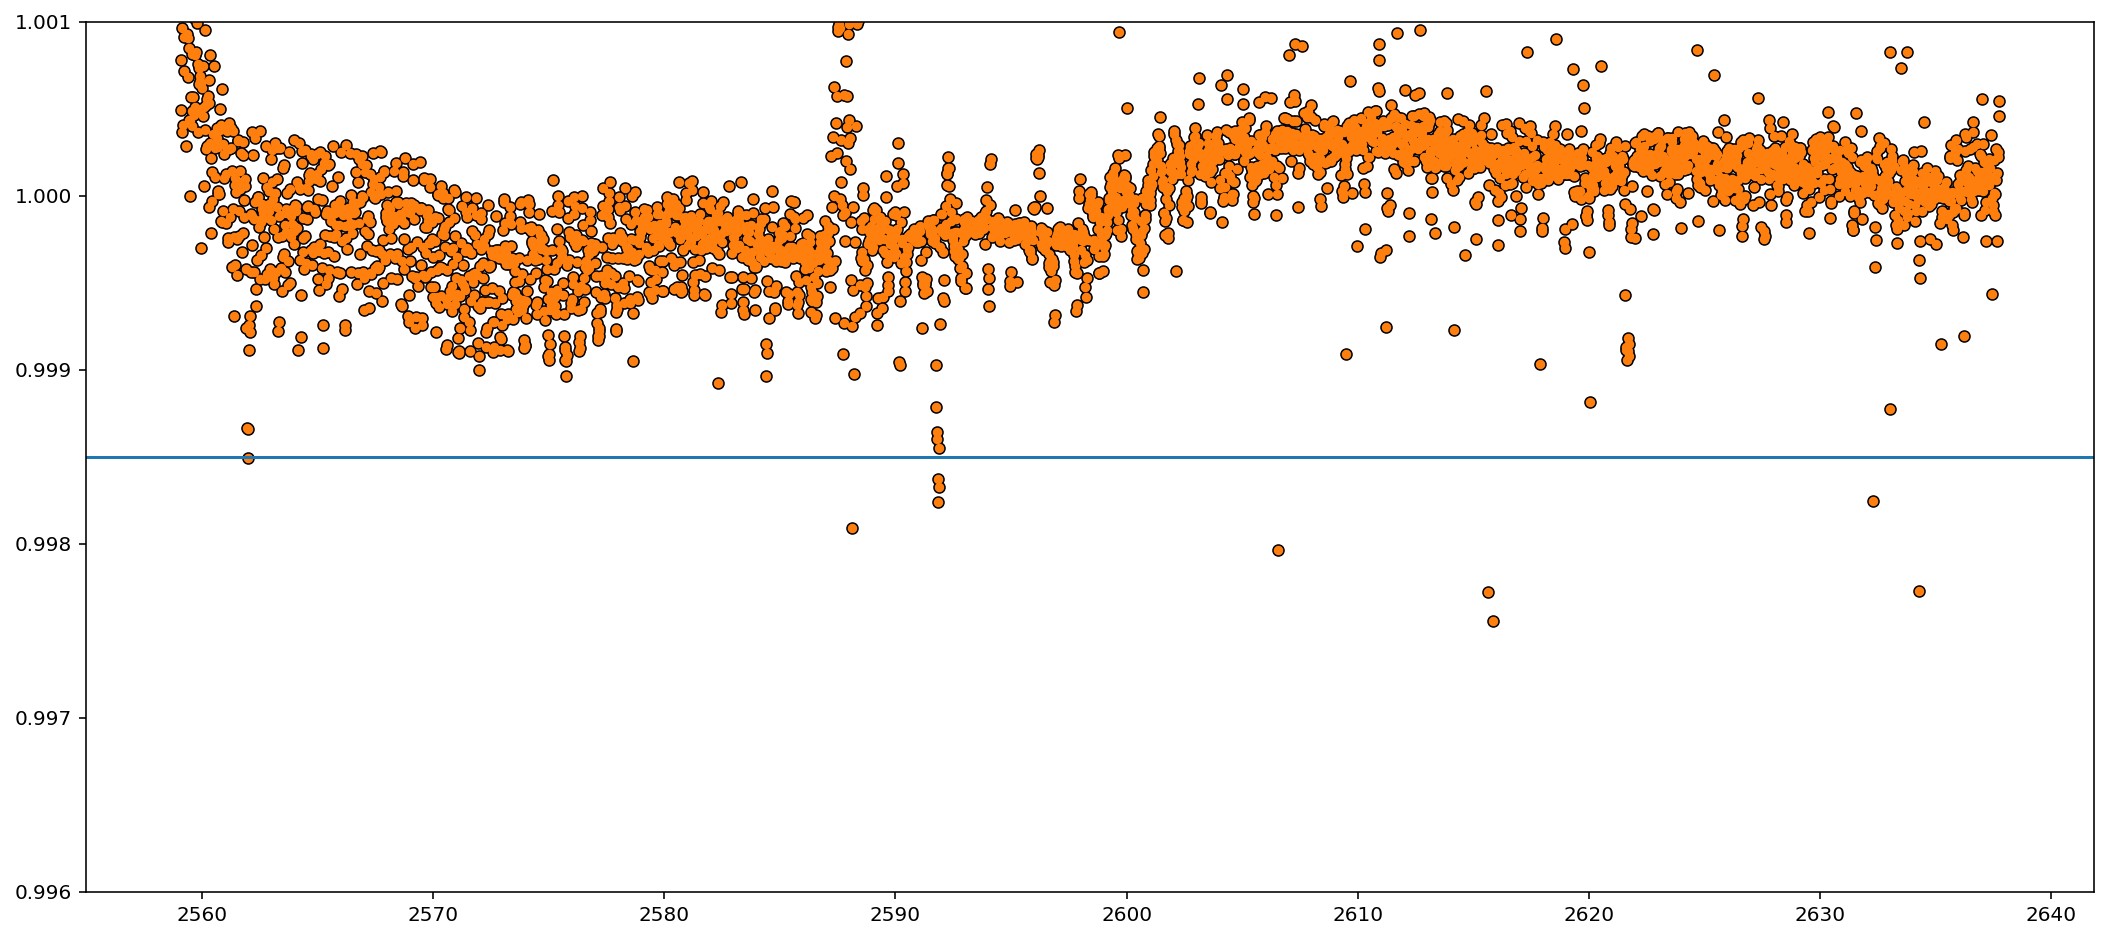

In [28]:
flux = star.fcor
plt.figure(figsize=(18, 8))
plt.scatter(star.time, flux/np.nanmedian(flux), marker='o', s=28, edgecolors='k')
plt.scatter(star.time, flux/np.nanmedian(flux), marker='o', s=14)
plt.axhline(0.9985)
plt.ylim(0.996, 1.0010)

The everest pipeline underperforms on this target.

INFO  [everest.basecamp.plot_aperture()]: Plotting the aperture...


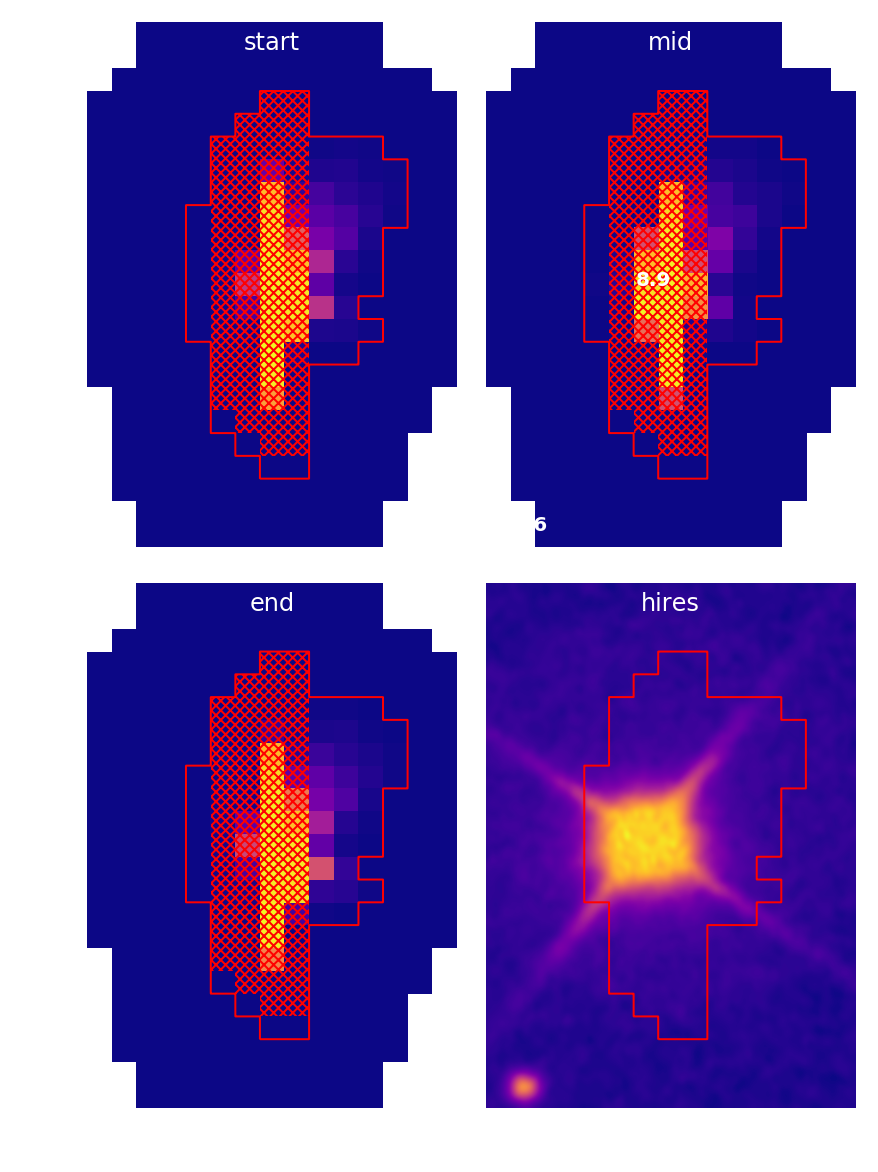

In [29]:
star.plot_aperture()

Maybe the saturation treatment is inadequate.

## Comparison to K2 Pipeline

In [20]:
#! wget https://archive.stsci.edu/missions/k2/lightcurves/c8/220300000/83000/ktwo220383386-c08_llc.fits

In [22]:
#! mv ktwo220383386-c08_llc.fits ../data/

In [20]:
hduk = fits.open('../data/ktwo220383386-c08_llc.fits')

In [21]:
#hduk.info()

In [22]:
hduk['LIGHTCURVE'].data['PDCSAP_FLUX']

array([        nan,  4022232.  ,  4021667.  , ...,  4024109.75,
        4022869.25,  4023647.5 ], dtype=float32)

(0.996, 1.001)

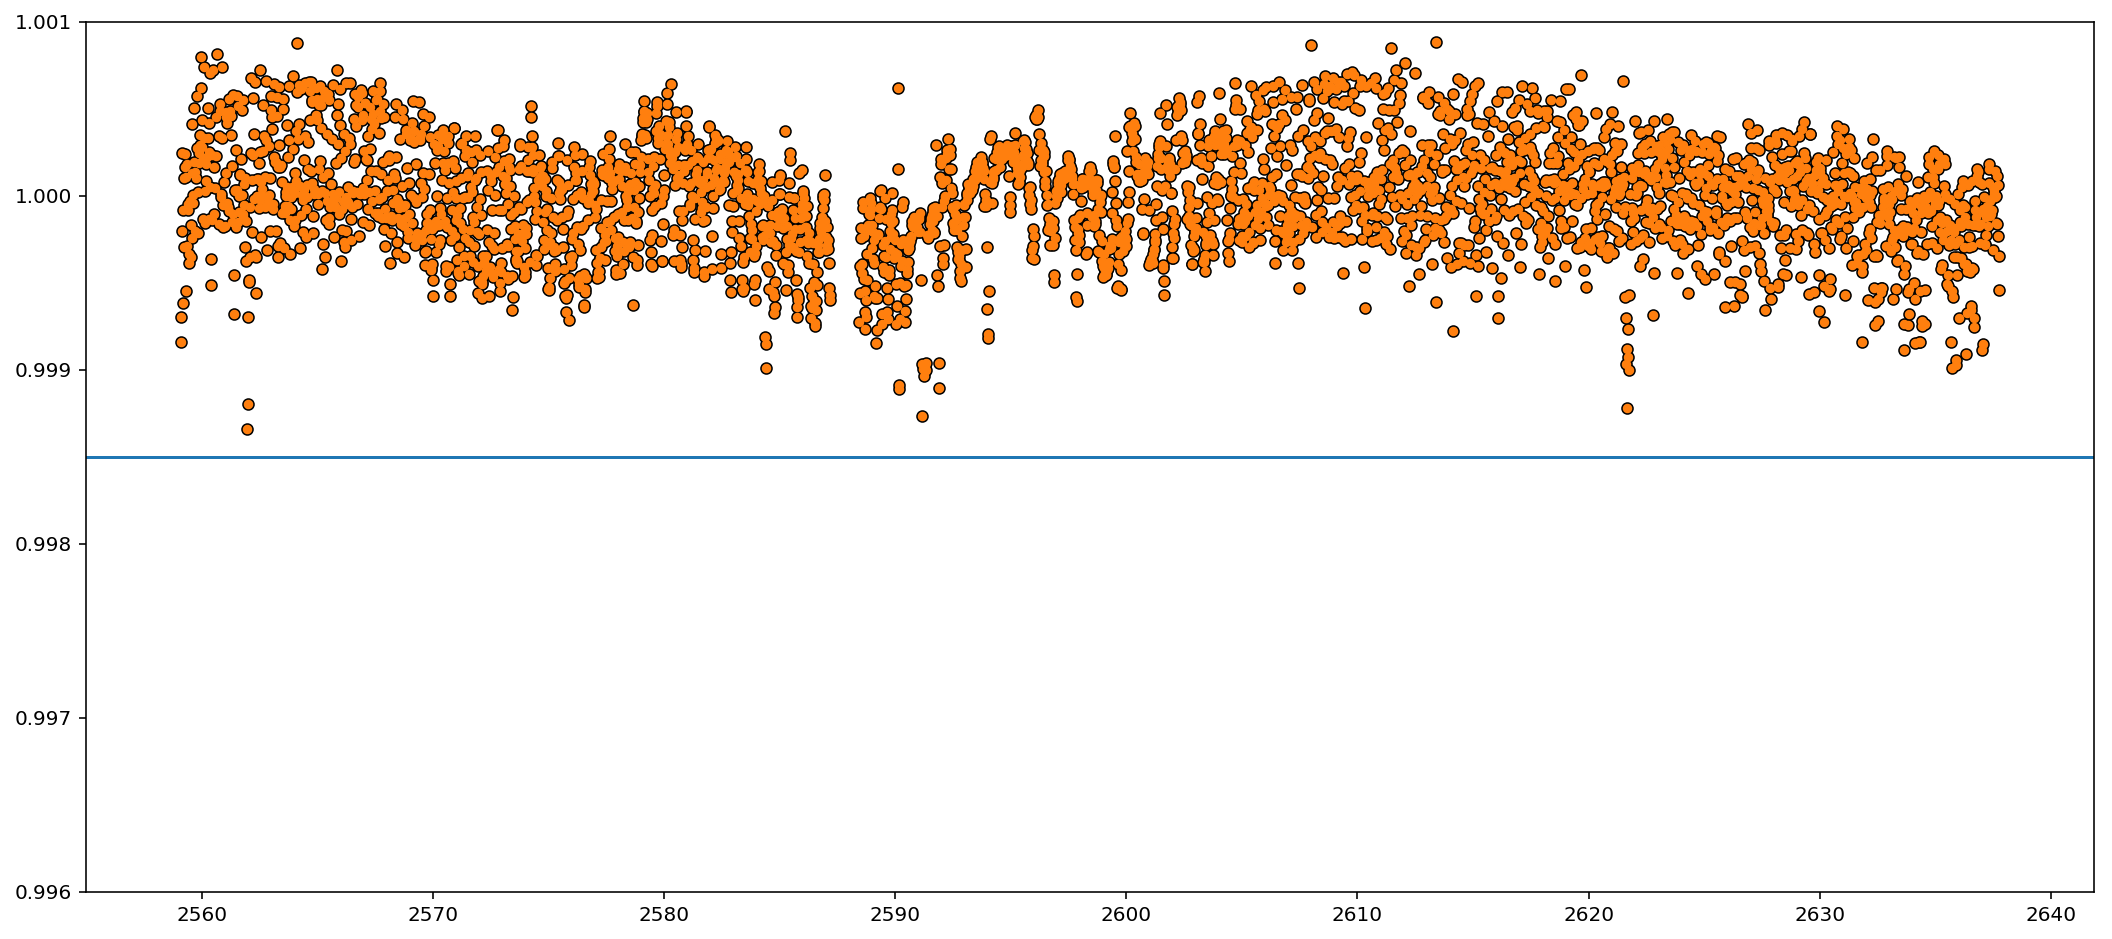

In [23]:
time = hduk['LIGHTCURVE'].data['TIME']
flux = hduk['LIGHTCURVE'].data['PDCSAP_FLUX'] / np.nanmedian(hduk['LIGHTCURVE'].data['PDCSAP_FLUX'])
plt.figure(figsize=(18, 8))
plt.scatter(time, flux, marker='o', s=28, edgecolors='k')
plt.scatter(time, flux, marker='o', s=14)
plt.axhline(0.9985)
plt.ylim(0.996, 1.0010)

Noisy.

## What about the reprocessed data?

### KSOP-2856

In [24]:
#! ls /soc/nfs/test-nfs5/ksop-2856-c8-cosmic-ray-turned-off/lcv/ | head -n 10

In [25]:
hduk2856 = fits.open('/soc/nfs/test-nfs5/ksop-2856-c8-cosmic-ray-turned-off/lcv/ktwo220383386-c08_llc.fits')

### KSOP-2912

In [26]:
hduk2912 = fits.open('/soc/nfs/test-nfs5/ksop-2912-c8-new-cr-threshold/archive_ksop2912/lcv/ktwo220383386-c08_llc.fits')

### KSOP-2961

In [27]:
hduk2961 = fits.open('/soc/nfs/production-nfs5/ksop-2961-C8-Dynablack-On/exports/lcv/ktwo220383386-c08_llc.fits')

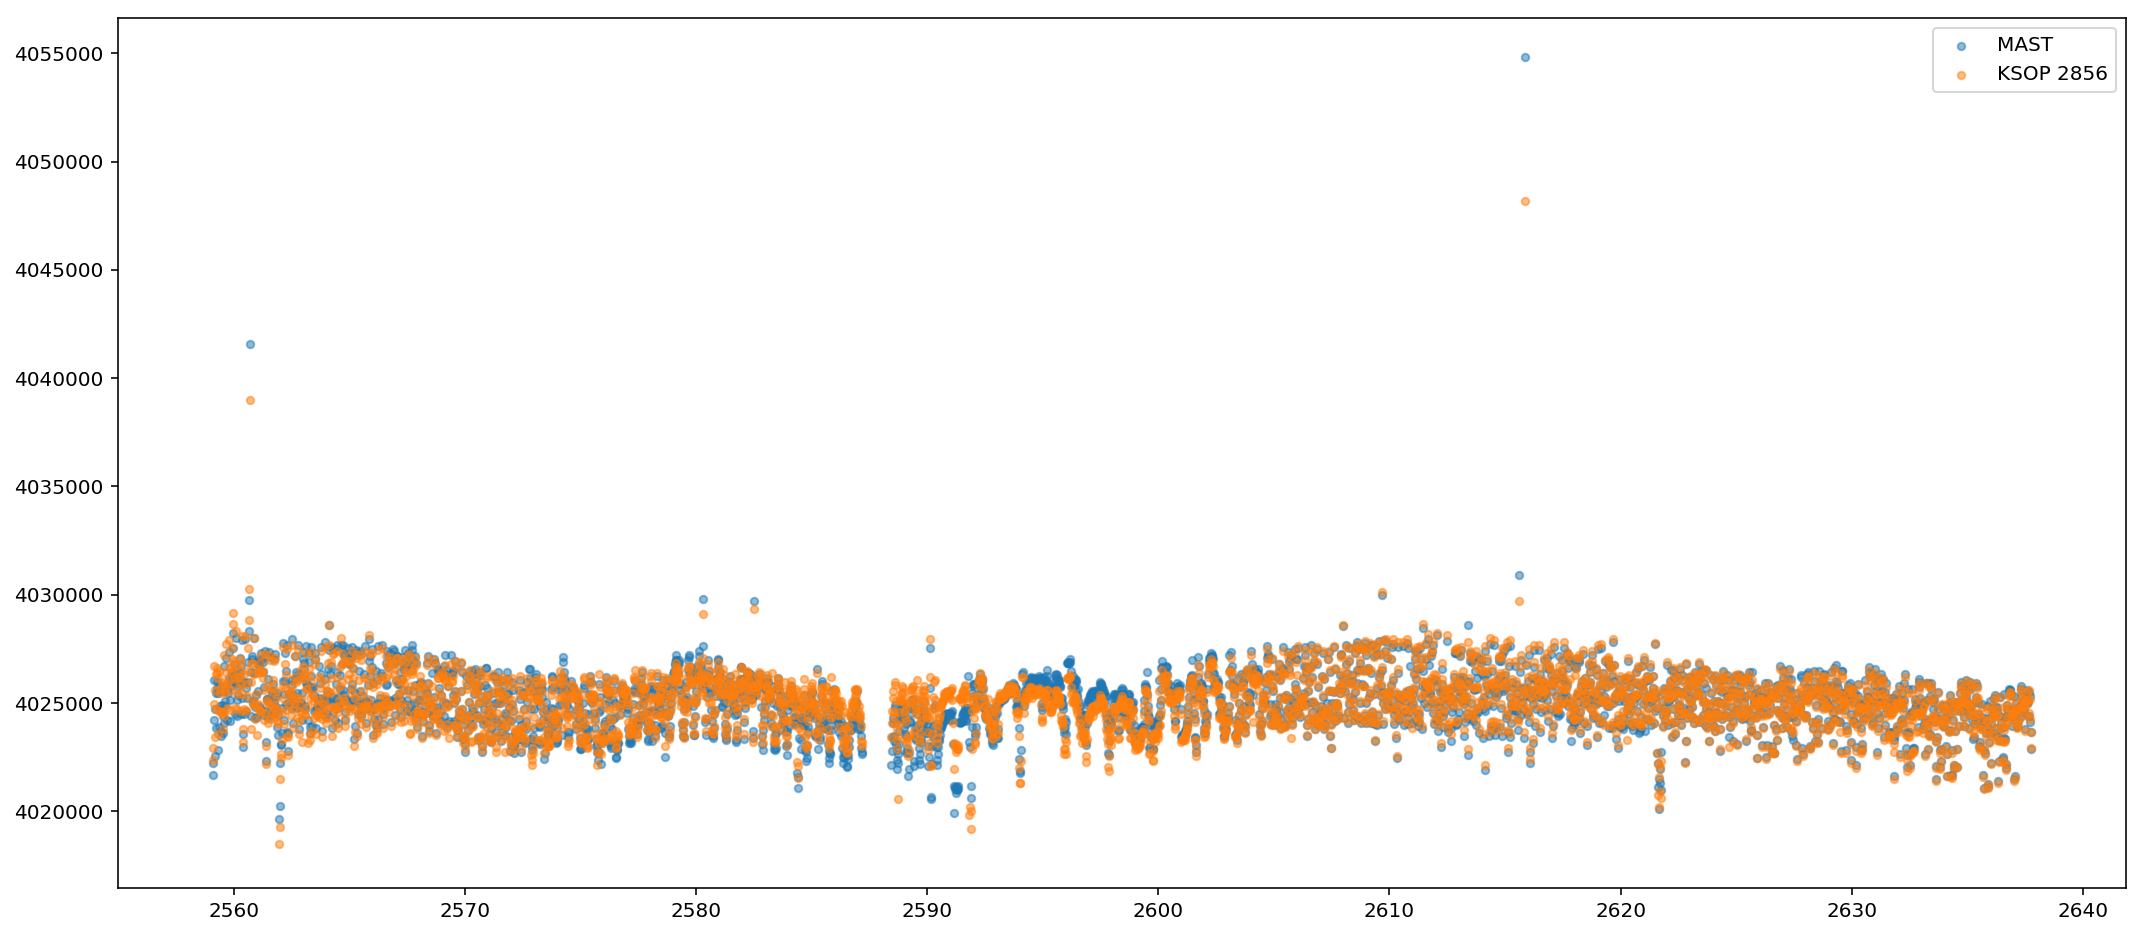

In [28]:
time = hduk['LIGHTCURVE'].data['TIME']
flux1 = hduk['LIGHTCURVE'].data['PDCSAP_FLUX']
flux2= hduk2856['LIGHTCURVE'].data['PDCSAP_FLUX']
plt.figure(figsize=(18, 8))
plt.scatter(time, flux1, marker='o', s=14, alpha=0.5, label='MAST')
plt.scatter(time, flux2, marker='o', s=14, alpha=0.5, label = 'KSOP 2856')
#plt.axhline(0.9985)
#plt.ylim(0.996, 1.0010)
plt.legend(loc='best')
plt.savefig('MAST_v_2856.png', dpi=300)

In [29]:
#plt.imshow(hduk['APERTURE'].data);
#plt.imshow(hduk2856['APERTURE'].data);
#plt.imshow(hduk2912['APERTURE'].data);

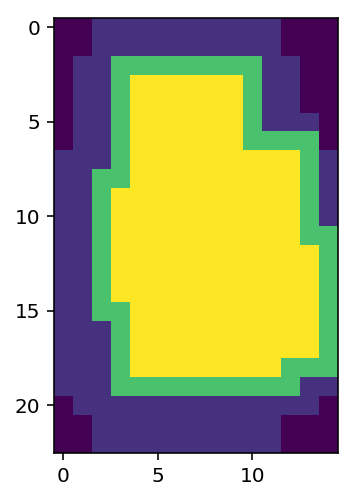

In [30]:
plt.imshow(hduk2961['APERTURE'].data);

In [31]:
(np.alltrue(hduk2912['APERTURE'].data == hduk['APERTURE'].data) &
 np.alltrue(hduk2961['APERTURE'].data == hduk['APERTURE'].data) &
 np.alltrue(hduk2856['APERTURE'].data == hduk['APERTURE'].data) )

True

The Apertures all have the same size.

In [32]:
time = hduk['LIGHTCURVE'].data['TIME']
flux1 = hduk['LIGHTCURVE'].data['SAP_FLUX']
flux2= hduk2856['LIGHTCURVE'].data['SAP_FLUX']
flux3= hduk2912['LIGHTCURVE'].data['SAP_FLUX']
flux4= hduk2961['LIGHTCURVE'].data['SAP_FLUX']

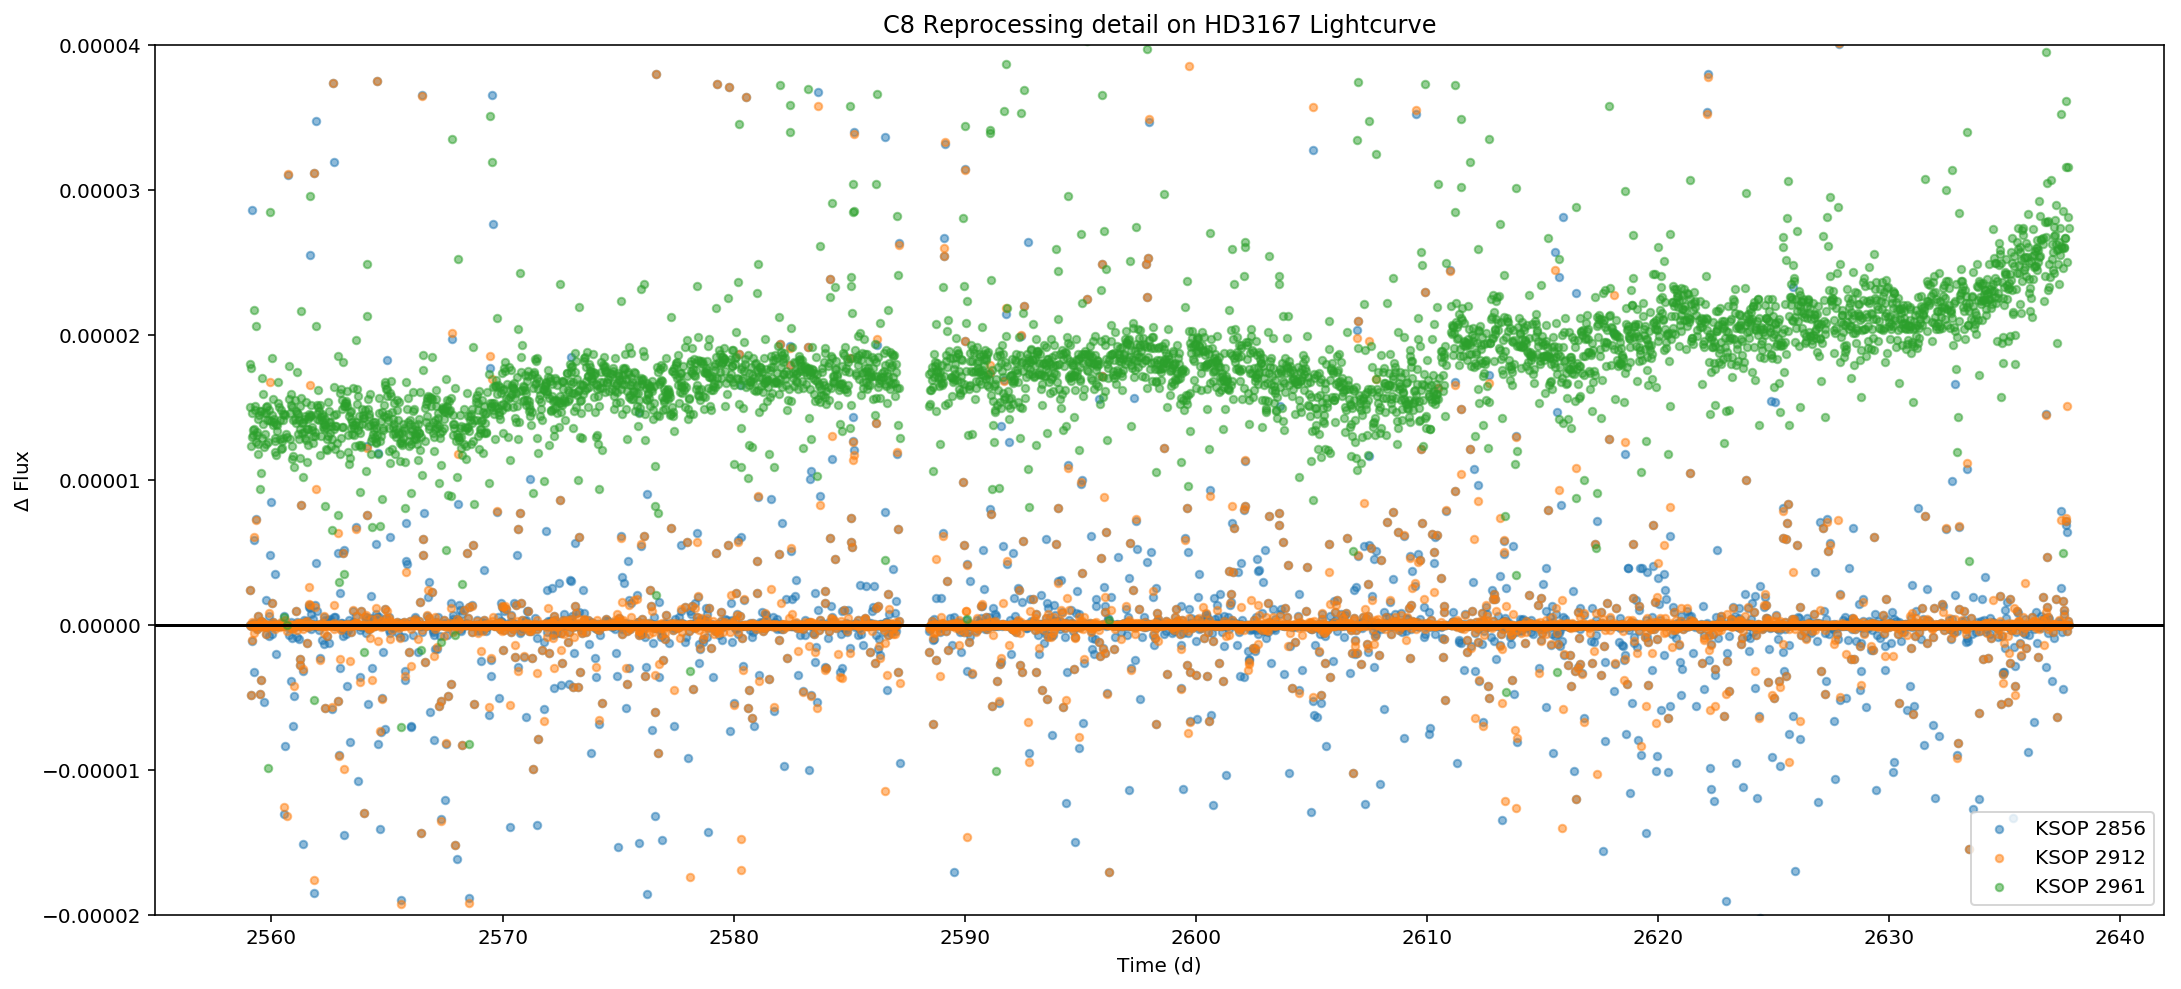

In [33]:
plt.figure(figsize=(18, 8))
plt.axhline(0.0, color='k')
plt.scatter(time, (flux1-flux2)/flux1, marker='o', s=14, alpha=0.5, label= 'KSOP 2856')
plt.scatter(time, (flux1-flux3)/flux1, marker='o', s=14, alpha=0.5, label= 'KSOP 2912')
plt.scatter(time, (flux1-flux4)/flux1, marker='o', s=14, alpha=0.5, label= 'KSOP 2961')
plt.legend(loc='best')
plt.xlabel('Time (d)')
plt.ylabel('$\Delta$ Flux')
plt.title('C8 Reprocessing detail on HD3167 Lightcurve')
plt.ylim(-0.00002, 0.00004)
plt.savefig('HD3167_diff.png', dpi=300, bbox_inches='tight');

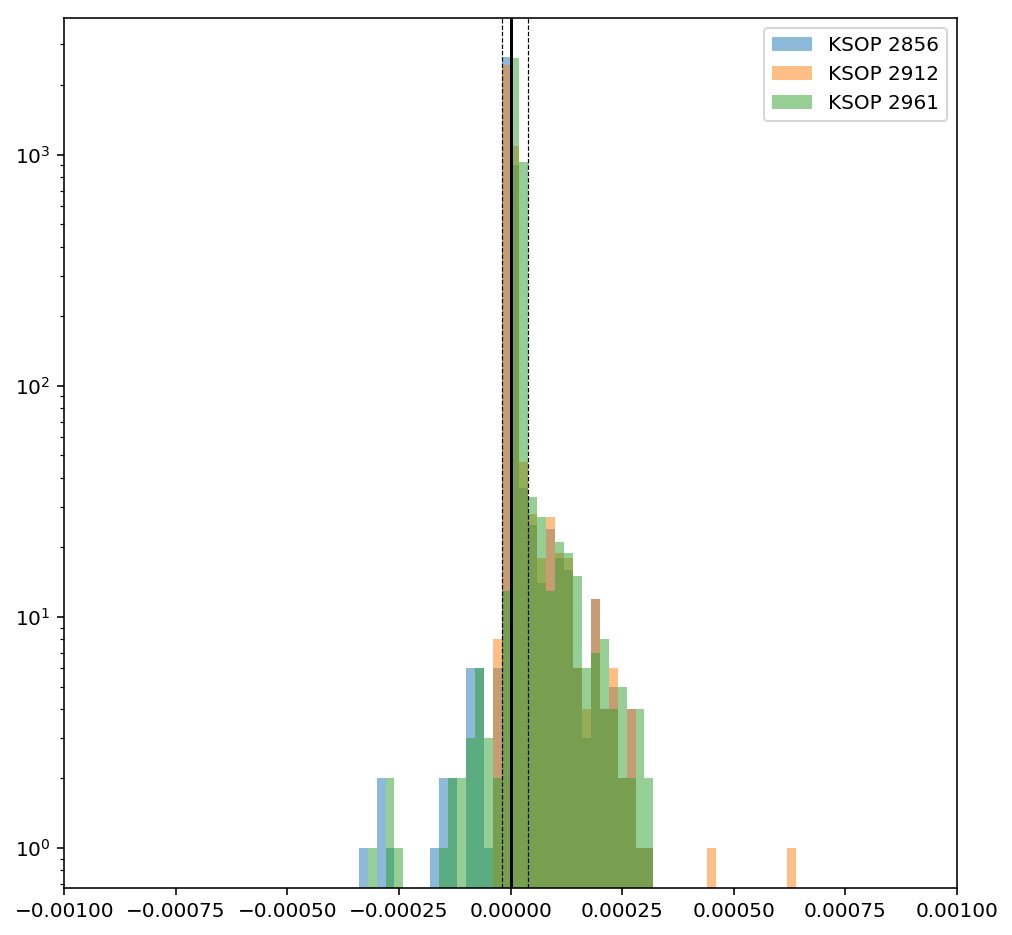

In [34]:
plt.figure(figsize=(8,8))
vec2 = (flux1-flux2)/flux1
vec3 = (flux1-flux3)/flux1
vec4 = (flux1-flux4)/flux1
plt.hist(vec3[vec3==vec3], bins=np.arange(-0.001, 0.001, 0.00002), alpha=0.5, label = 'KSOP 2856')
plt.hist(vec2[vec2==vec2], bins=np.arange(-0.001, 0.001, 0.00002) , alpha=0.5, label = 'KSOP 2912')
plt.hist(vec4[vec4==vec4], bins=np.arange(-0.001, 0.001, 0.00002) , alpha=0.5, label = 'KSOP 2961')
plt.yscale('log')
plt.axvline(-0.00002, linestyle='dashed', color='k', lw=0.6)
plt.axvline(0.0, color='k')
plt.axvline(0.00004, linestyle='dashed', color='k', lw=0.6)
plt.xlim(-0.001, 0.001)
plt.legend(loc='best')
plt.savefig('HD3167_hist1.png');

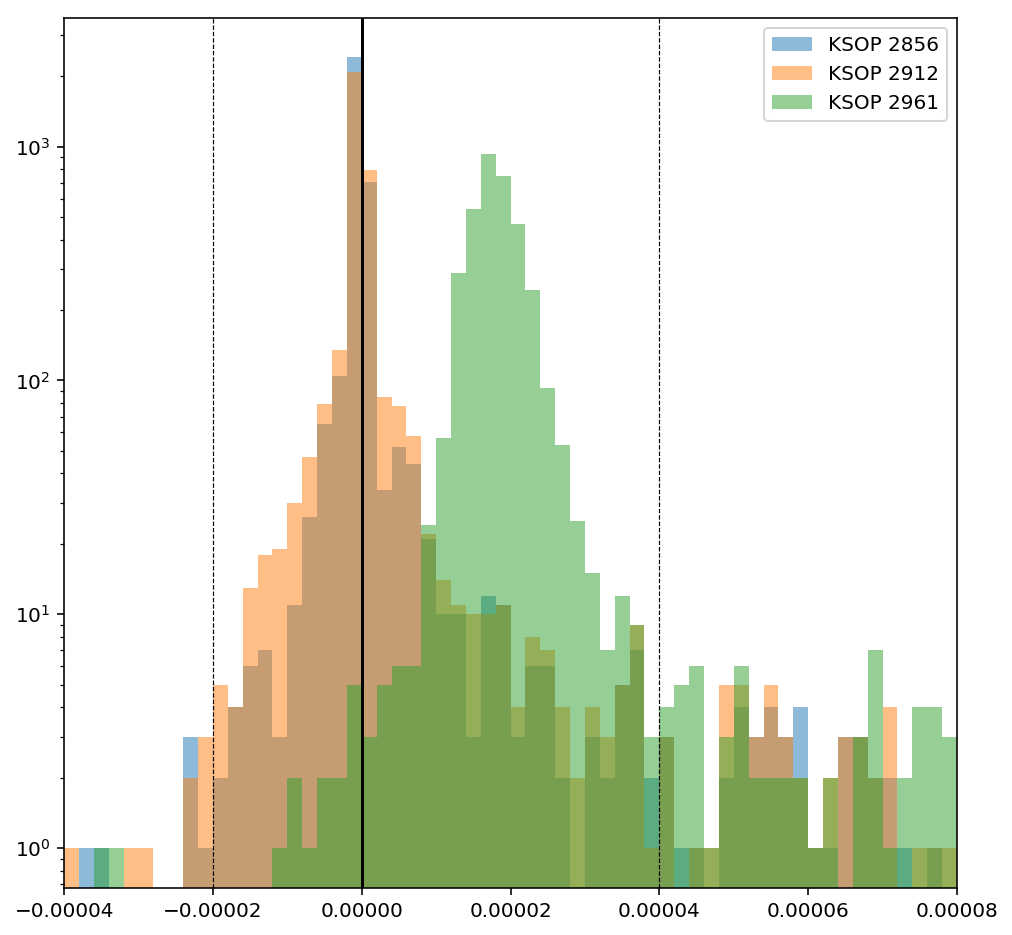

In [35]:
plt.figure(figsize=(8,8))
vec2 = (flux1-flux2)/flux1
vec3 = (flux1-flux3)/flux1
vec4 = (flux1-flux4)/flux1
plt.hist(vec3[vec3==vec3], bins=np.arange(-0.001, 0.001, 0.000002), alpha=0.5, label = 'KSOP 2856')
plt.hist(vec2[vec2==vec2], bins=np.arange(-0.001, 0.001, 0.000002) , alpha=0.5, label = 'KSOP 2912')
plt.hist(vec4[vec4==vec4], bins=np.arange(-0.001, 0.001, 0.000002) , alpha=0.5, label = 'KSOP 2961')
plt.yscale('log')
plt.axvline(-0.00002, linestyle='dashed', color='k', lw=0.6)
plt.axvline(0.0, color='k')
plt.axvline(0.00004, linestyle='dashed', color='k', lw=0.6)
plt.xlim(-0.00004, 0.00008)
plt.legend(loc='best')
plt.savefig('HD3167_hist2.png');

### Not much different

What about the phase folded lightcurve though?  Need to use PDC

In [42]:
time = hduk['LIGHTCURVE'].data['TIME']
flux1 = hduk['LIGHTCURVE'].data['PDCSAP_FLUX']
flux2= hduk2856['LIGHTCURVE'].data['PDCSAP_FLUX']
flux3= hduk2912['LIGHTCURVE'].data['PDCSAP_FLUX']
flux4= hduk2961['LIGHTCURVE'].data['PDCSAP_FLUX']

In [44]:
time

array([ 2559.0680847 ,  2559.08851681,  2559.10894891, ...,  2637.73007514,
        2637.75050714,  2637.77093904])

# Phase folded lightcurve, from Vanderburg et al. 2016

In [47]:
t2 = 2457394.37450 - 2454833.0

In [69]:
p1 = 0.959628
p2 = 29.8454

Hmm the times are different shapes:

In [67]:
df_llc['BJD - 2454833'].shape, time.shape

((3448,), (3853,))

In [59]:
from astroML.linear_model import LinearRegression, PolynomialRegression,\
    BasisFunctionRegression, NadarayaWatson

We need to divide out the smooth trend.  Just use Gaussian smoothing.  See the astroML book figure 8.2.

In [106]:
df_llc['BJD'] = df_llc['BJD - 2454833'] + 2454833.0
df_llc['phaseb'] = np.mod(df_llc.BJD - 2457394.37450, p1)
df_llc['phasec'] = np.mod(df_llc.BJD - 2457394.9788, p2)

Fit the function.

In [105]:
x = df_llc['BJD - 2454833']
y = df_llc['Corrected Flux']

clf = NadarayaWatson('gaussian', h=0.75)

clf.fit(x[:, None], 
        y, y*0.0+0.0001)

vdb_fit = clf.predict(x[:, None])

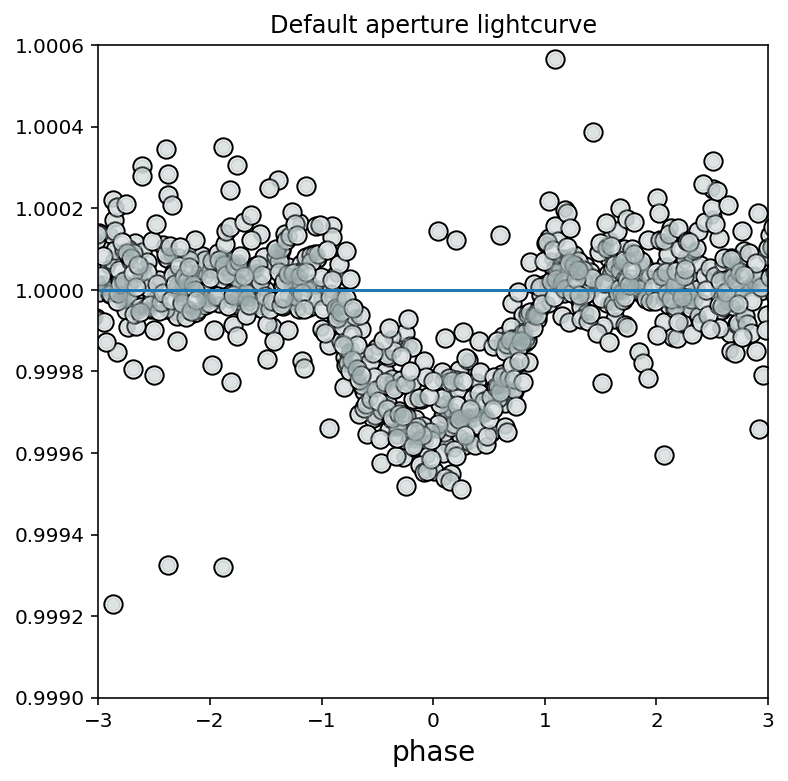

In [130]:
plt.figure(figsize=(6, 6))
x_axis = df_llc['phaseb']*24.0
plt.scatter(x_axis, df_llc['Corrected Flux']/vdb_fit, marker='o', s=28*3, edgecolors='k', color='#ffffff')
plt.scatter(x_axis-p1*24, df_llc['Corrected Flux']/vdb_fit, marker='o', s=28*3, edgecolors='k', color='#ffffff')
plt.scatter(x_axis, df_llc['Corrected Flux']/vdb_fit, marker='o', s=14*3, color='#95a5a6', alpha=0.3)
plt.scatter(x_axis-p1*24, df_llc['Corrected Flux']/vdb_fit, marker='o', s=14*3, color='#95a5a6', alpha=0.3)

plt.axhline(y=1)

plt.ylim(0.9990, 1.0006) 
plt.xlim(-3, 3)
plt.xlabel('phase', fontsize=14)
plt.title('Default aperture lightcurve');

Strong signal.

# Phase folded lightcurve, reprocessed data

In [107]:
BJD_pdc = time + 2454833.0
phaseb = np.mod(BJD_pdc - 2457394.37450, p1)
phasec = np.mod(BJD_pdc - 2457394.9788, p2)

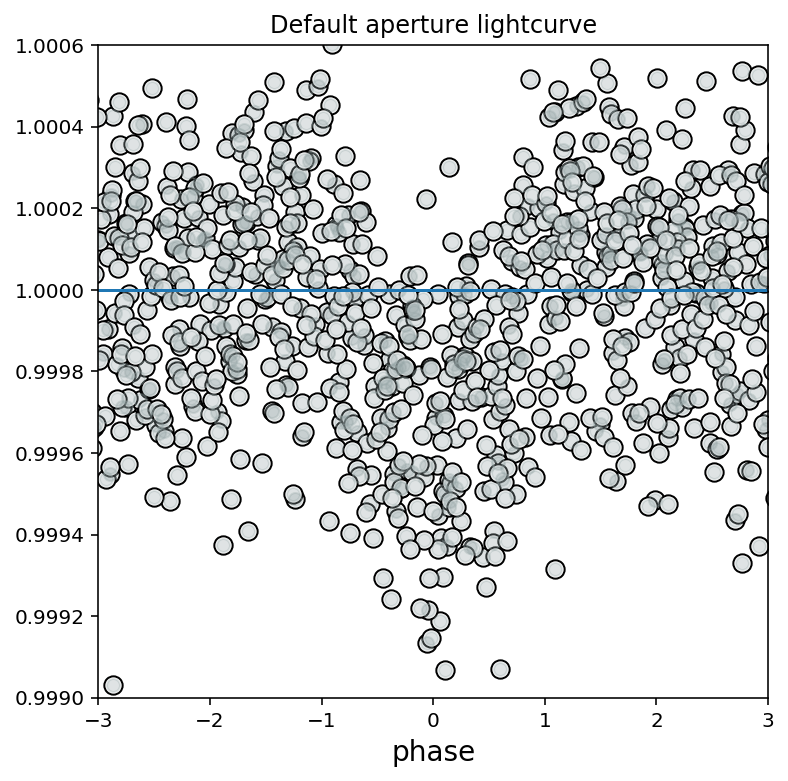

In [128]:
proc = flux2
gi1 = (proc==proc) & (time==time)

x = time[gi1]
y = proc[gi1]

clf = NadarayaWatson('gaussian', h=0.75)

clf.fit(x[:, None], 
        y, y*0.0+0.0004)

f1_fit = clf.predict(x[:, None])

plt.figure(figsize=(6, 6))
x_axis = phaseb[gi1]*24.0
plt.scatter(x_axis, y/f1_fit, marker='o', s=28*3, edgecolors='k', color='#ffffff')
plt.scatter(x_axis-p1*24, y/f1_fit, marker='o', s=28*3, edgecolors='k', color='#ffffff')
plt.scatter(x_axis, y/f1_fit, marker='o', s=14*3, color='#95a5a6', alpha=0.3)
plt.scatter(x_axis-p1*24, y/f1_fit, marker='o', s=14*3, color='#95a5a6', alpha=0.3)

plt.axhline(y=1)

plt.ylim(0.9990, 1.0006) 
plt.xlim(-3, 3)
plt.xlabel('phase', fontsize=14)
plt.title('Default aperture lightcurve');

WAY worse than with SFF.